Skript to Visualize and Replicate Axtell 99

In [129]:
import matplotlib.pyplot as plt
import dask.dataframe as dd
import pandas as pd
import scipy.signal
import numpy as np

In [2]:
out_dir = "../results/axtell_99"

In [109]:
opttype = 2

In [110]:
run = 100

In [147]:
def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

In [111]:
path_f = f"{out_dir}/res_firm_agent_run{run}_opttype{opttype}.csv.gz"

In [112]:
path_w = f"{out_dir}/res_worker_agent_run{run}_opttype{opttype}.csv.gz"

In [113]:
path_m = f"{out_dir}/res_model_agent_run{run}_opttype{opttype}.csv.gz"

In [114]:
model_dk = dd.read_csv(path_m, blocksize=None)

In [115]:
firm_dk = dd.read_csv(path_f, blocksize=None , dtype={
    "t": "int16",
    "id": "int32",
    "age": "int16",
    "number_employees": "int32",
    "total_effort": "float64",
    "output": "float64",
    "average_pref": "float64"}
)

In [116]:
df = model_dk.compute()

In [117]:
firm_dk.compute()

,t,id,age,number_employees,total_effort,output,average_pref
0,0,2,1,1,0.300,0.390,0.300
1,0,4,1,1,0.761,1.340,0.761
2,0,8,1,1,0.422,0.600,0.422
3,0,10,1,1,0.861,1.603,0.861
4,0,12,1,1,0.040,0.042,0.040
...,...,...,...,...,...,...,...
245660,999,24912,1,1,0.948,1.846,0.948
245661,999,24913,1,1,0.934,1.806,0.934
245662,999,24914,1,1,0.980,1.940,0.980
245663,999,24915,1,1,0.880,1.654,0.880


In [118]:
firm_number = firm_dk.groupby(firm_dk.t).t.size()

In [119]:
firm_number.compute()

t
0      1000
1       916
2       828
3       777
4       722
       ... 
995     237
996     245
997     230
998     233
999     227
Name: t, Length: 1000, dtype: int64

In [120]:
df

,t,total_firms,numb_new_firms,numb_dead_firms
0,0,1000,98,98
1,1,916,6,90
2,2,828,4,92
3,3,777,9,60
4,4,722,8,63
...,...,...,...,...
995,995,237,14,26
996,996,245,29,21
997,997,230,10,25
998,998,233,24,21


In [148]:
width = 390

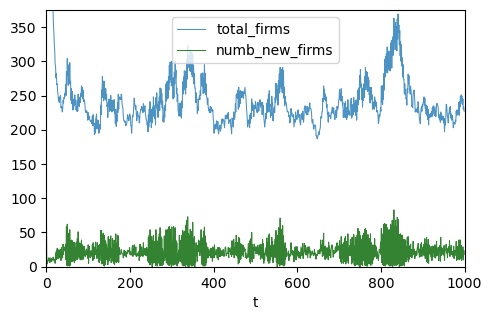

In [162]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.set_ylim([0,375])
ax.set_xlim([0,1000])
df.plot(kind="line", y = "total_firms", x="t", ax=ax, linewidth=0.75, alpha=0.8)
df.plot(kind="line", y = "numb_new_firms", x="t", color="darkgreen", ax=ax, linewidth=0.75, alpha=0.8)
plt.show()

In [70]:
plt.show()

In [143]:
average_firm = firm_dk.groupby(firm_dk.t).number_employees.mean().compute()

In [144]:
average_firm

t
0      1.000000
1      1.091703
2      1.207729
3      1.287001
4      1.385042
         ...   
995    4.219409
996    4.081633
997    4.347826
998    4.291845
999    4.405286
Name: number_employees, Length: 1000, dtype: float64

In [145]:
max_firm = firm_dk.groupby(firm_dk.t).number_employees.max().compute()

In [146]:
max_firm

t
0        1
1        3
2        5
3        5
4        8
      ... 
995    763
996    755
997    770
998    767
999    773
Name: number_employees, Length: 1000, dtype: int32

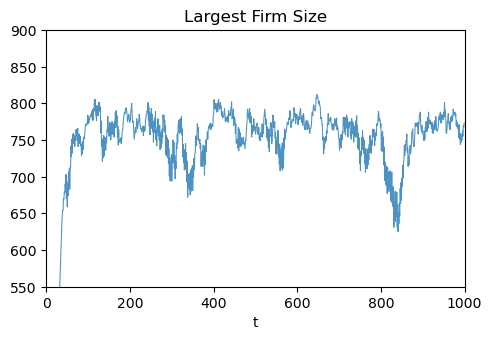

In [168]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.set_ylim([550,900])
ax.set_xlim([0,1000])
ax.set_title("Largest Firm Size")
max_firm.plot(kind="line", y = "Largest Firm Size", x="t", ax=ax, linewidth=0.75, alpha=0.8)
plt.show()

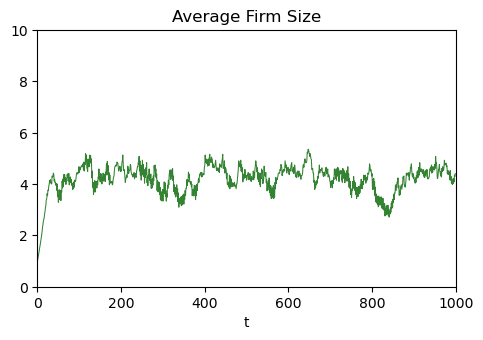

In [171]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.set_ylim([0,10])
ax.set_xlim([0,1000])
ax.set_title("Average Firm Size")
average_firm.plot(kind="line", y = "Average Firm Size", x="t", color="darkgreen", ax=ax, linewidth=0.75, alpha=0.8)
plt.show()

Effort Levels

Average effort level (from worker df)

In [172]:
worker_dk = dd.read_csv(path_w, blocksize=None)

In [174]:
avg_effort = worker_dk.groupby(worker_dk.t).effort.mean().compute()

In [175]:
avg_effort

t
0      0.548364
1      0.530780
2      0.504406
3      0.488497
4      0.469726
         ...   
995    0.200764
996    0.214656
997    0.196873
998    0.206948
999    0.194522
Name: effort, Length: 1000, dtype: float64

In [184]:
firm_dk.assign(avg_e = firm_dk.total_effort/firm_dk.number_employees).groupby(firm_dk.t).number_employees.idxmax()

Dask Series Structure:
npartitions=1
    int64
      ...
Name: number_employees, dtype: int64
Dask Name: series-groupby-idxmax-agg, 8 tasks

In [191]:
filtered_firm_dk = firm_dk[firm_dk.groupby(["t"]).number_employees.transform(max) == firm_dk["number_employees"]].assign(avg_e = firm_dk.total_effort/firm_dk.number_employees)

C:\Users\41782\AppData\Local\Temp\ipykernel_28596\188437644.py:1: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .transform(func)
  After:  .transform(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .transform(func, meta=('x', 'f8'))            for series result
  filtered_firm_dk = firm_dk[firm_dk.groupby(["t"]).number_employees.transform(max) == firm_dk["number_employees"]].assign(avg_e = firm_dk.total_effort/firm_dk.number_employees)


In [192]:
avg_effort_maxfirm = filtered_firm_dk.groupby("t").avg_e.mean().compute()

In [193]:
avg_effort_maxfirm

t
0      0.548364
1      0.562222
2      0.440500
3      0.382167
4      0.229500
         ...   
995    0.021680
996    0.031297
997    0.022539
998    0.032128
999    0.019241
Name: avg_e, Length: 1000, dtype: float64

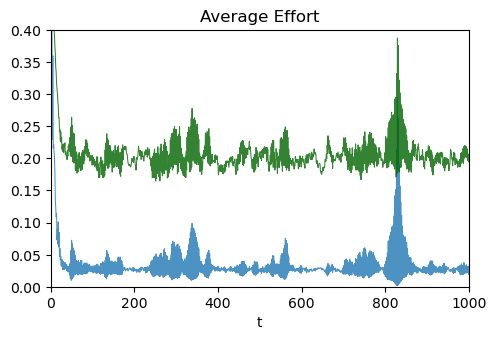

In [198]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.set_ylim([0,0.4])
ax.set_xlim([0,1000])
ax.set_title("Average Effort")
avg_effort_maxfirm.plot(kind="line", y = "total_firms", x="t", ax=ax, linewidth=0.75, alpha=0.8)
avg_effort.plot(kind="line", y = "numb_new_firms", x="t", color="darkgreen", ax=ax, linewidth=0.75, alpha=0.8)
plt.show()

Output Total and Largest Firm

In [199]:
filtered_firm_dk2 = firm_dk[firm_dk.groupby(["t"]).number_employees.transform(max) == firm_dk["number_employees"]]

C:\Users\41782\AppData\Local\Temp\ipykernel_28596\2543161246.py:1: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .transform(func)
  After:  .transform(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .transform(func, meta=('x', 'f8'))            for series result
  filtered_firm_dk2 = firm_dk[firm_dk.groupby(["t"]).number_employees.transform(max) == firm_dk["number_employees"]]


In [201]:
output_max_firm = filtered_firm_dk2.groupby("t").output.max().compute()

In [202]:
output_max_firm

t
0        1.997
1        8.478
2       14.778
3       12.345
4        5.209
        ...   
995    290.176
996    581.978
997    318.569
998    631.872
999    236.067
Name: output, Length: 1000, dtype: float64

In [210]:
output_total = firm_dk.groupby("t").output.sum().compute()

In [211]:
output_total

t
0      934.692
1      955.343
2      953.891
3      949.546
4      949.315
        ...   
995    627.217
996    931.437
997    647.337
998    965.987
999    567.136
Name: output, Length: 1000, dtype: float64

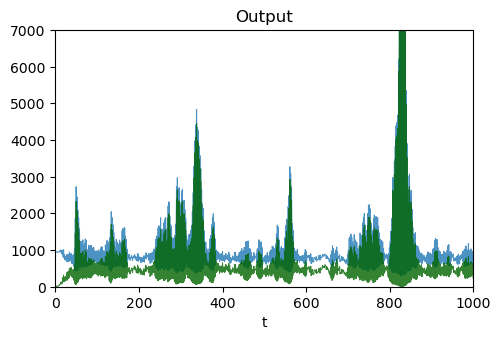

In [221]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.set_ylim([0,7000])
ax.set_xlim([0,1000])
ax.set_title("Output")
output_total.plot(kind="line", y = "total_firms", x="t", ax=ax, linewidth=0.75, alpha=0.8)
output_max_firm.plot(kind="line", y = "numb_new_firms", x="t", color="darkgreen", ax=ax, linewidth=0.75, alpha=0.8)
plt.show()